<a href="https://colab.research.google.com/github/earo12/Stock-Market-Analysis/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Analysis






In this project we're going to Analyse and predict some data for companies like Apple, Google, Microsoft and Amazon as well.

Here, we're going to apply some different techniques like LSTM and so on in order to make it more readible!

As usual we have to load all the libraries we're going to use:

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

# libraries used for the model
from keras.models import Sequential
from keras.layers import Dense, LSTM

Now, I'm gonna define some lists that are related with the categories of some companies like Google, Apple, Microsoft and Amazon.

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-01,104.949997,105.230003,101.820000,102.050003,102.050003,74728100,AMAZON
2023-05-02,101.470001,103.900002,101.150002,103.629997,103.629997,73469400,AMAZON
2023-05-03,103.739998,105.959999,103.279999,103.650002,103.650002,65051900,AMAZON
2023-05-04,104.040001,105.389999,103.309998,104.000000,104.000000,45345500,AMAZON
2023-05-05,104.269997,105.760002,103.550003,105.660004,105.660004,56912900,AMAZON
2023-05-08,105.040001,106.099998,104.699997,105.830002,105.830002,49430900,AMAZON
2023-05-09,105.480003,106.790001,105.160004,106.620003,106.620003,44089400,AMAZON
2023-05-10,108.099998,110.669998,108.050003,110.190002,110.190002,78627600,AMAZON
2023-05-11,111.029999,113.279999,110.489998,112.180000,112.180000,74924800,AMAZON


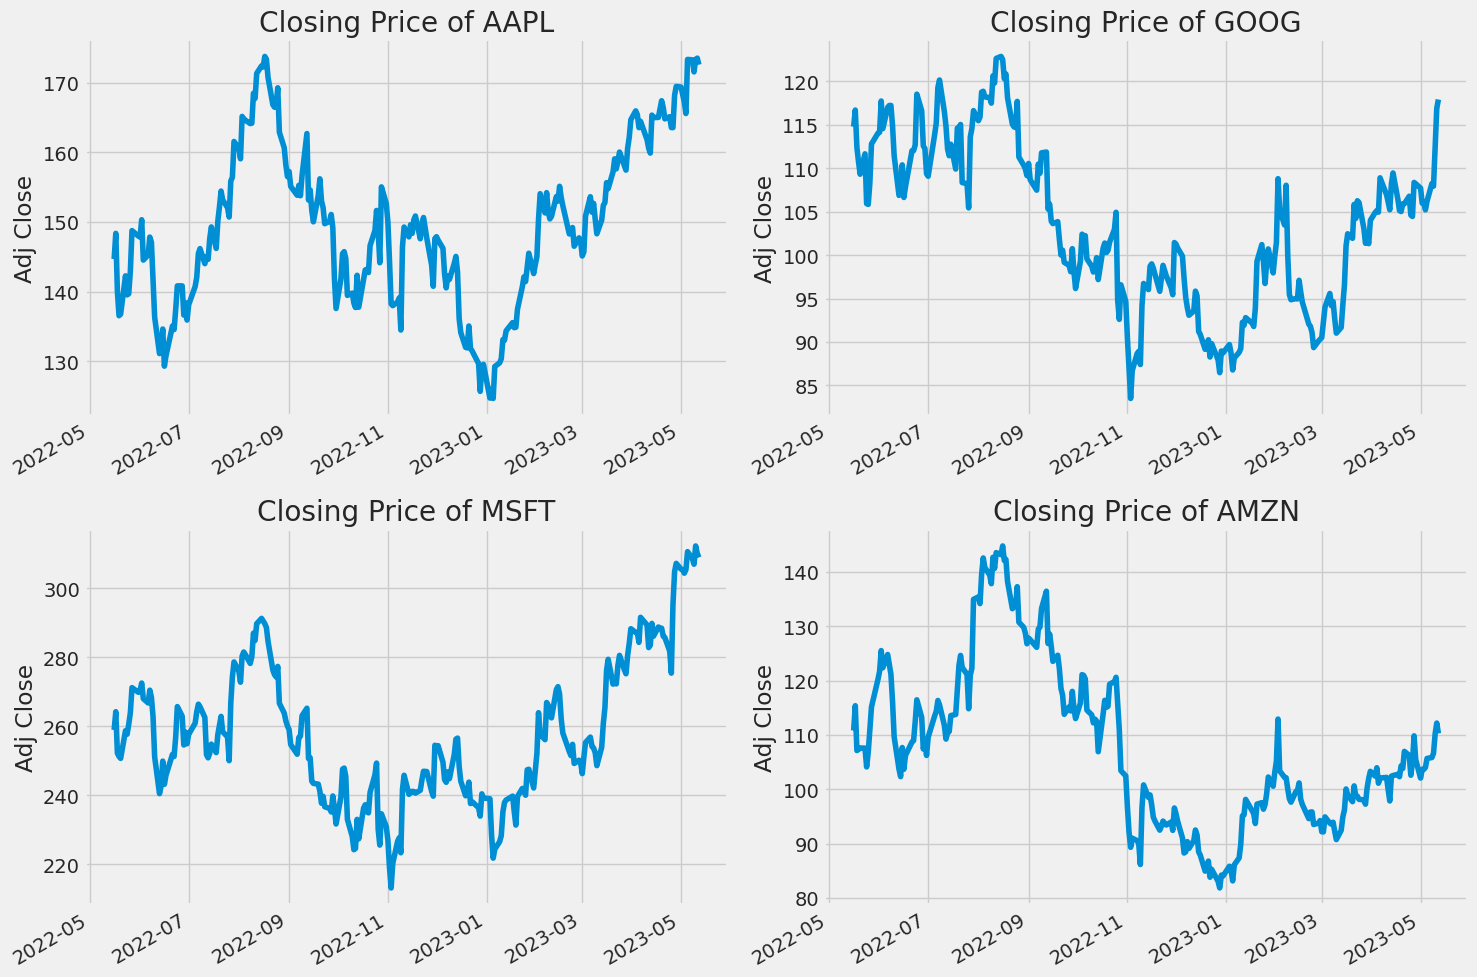

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

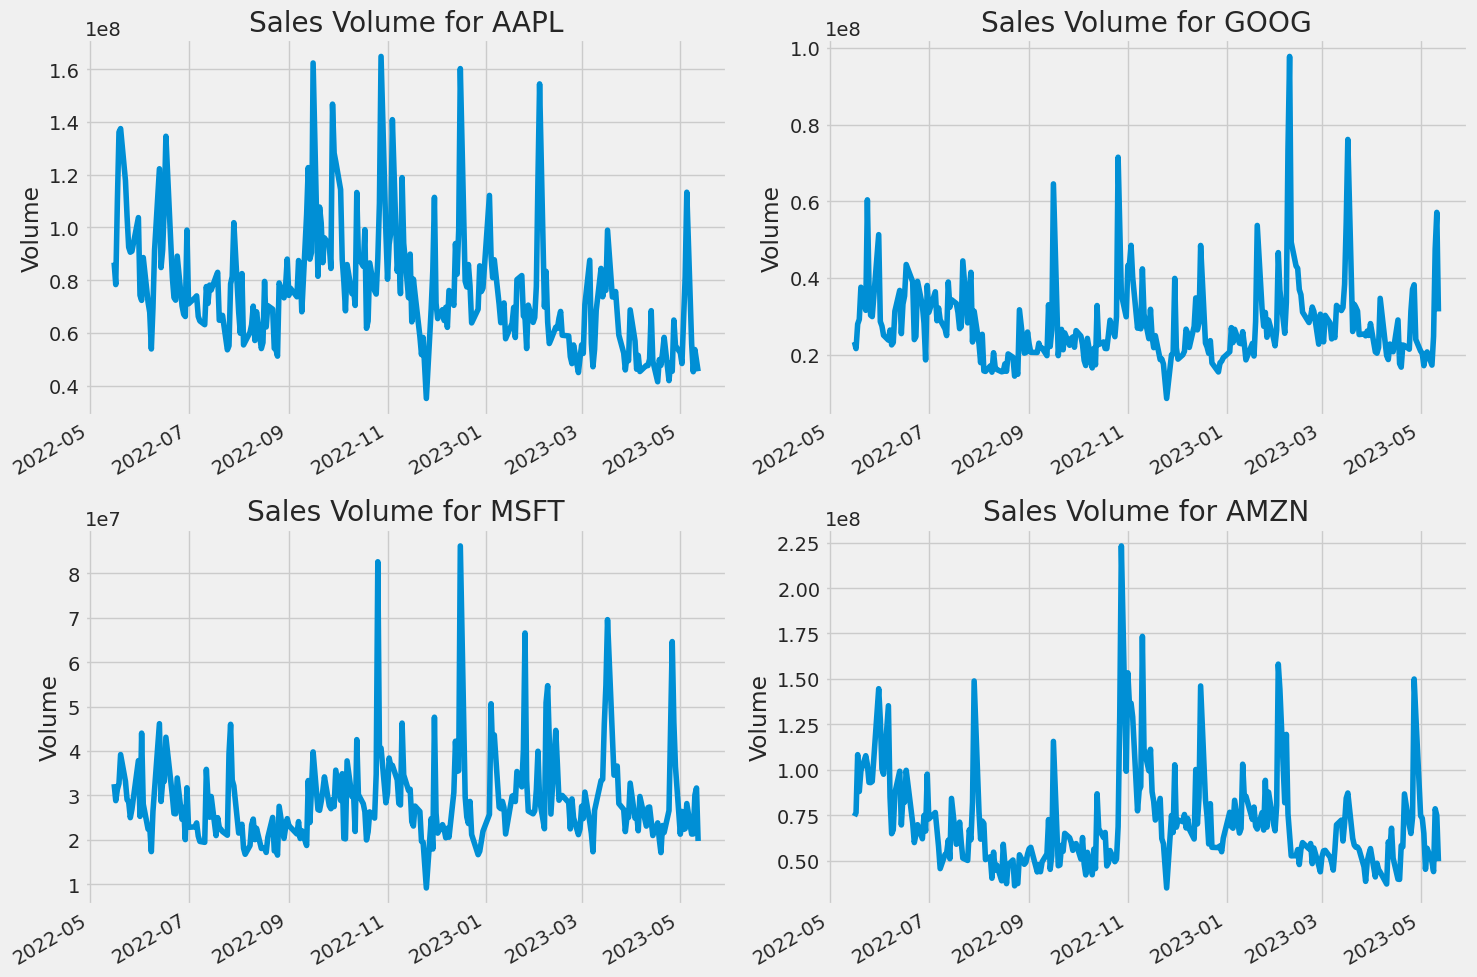

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

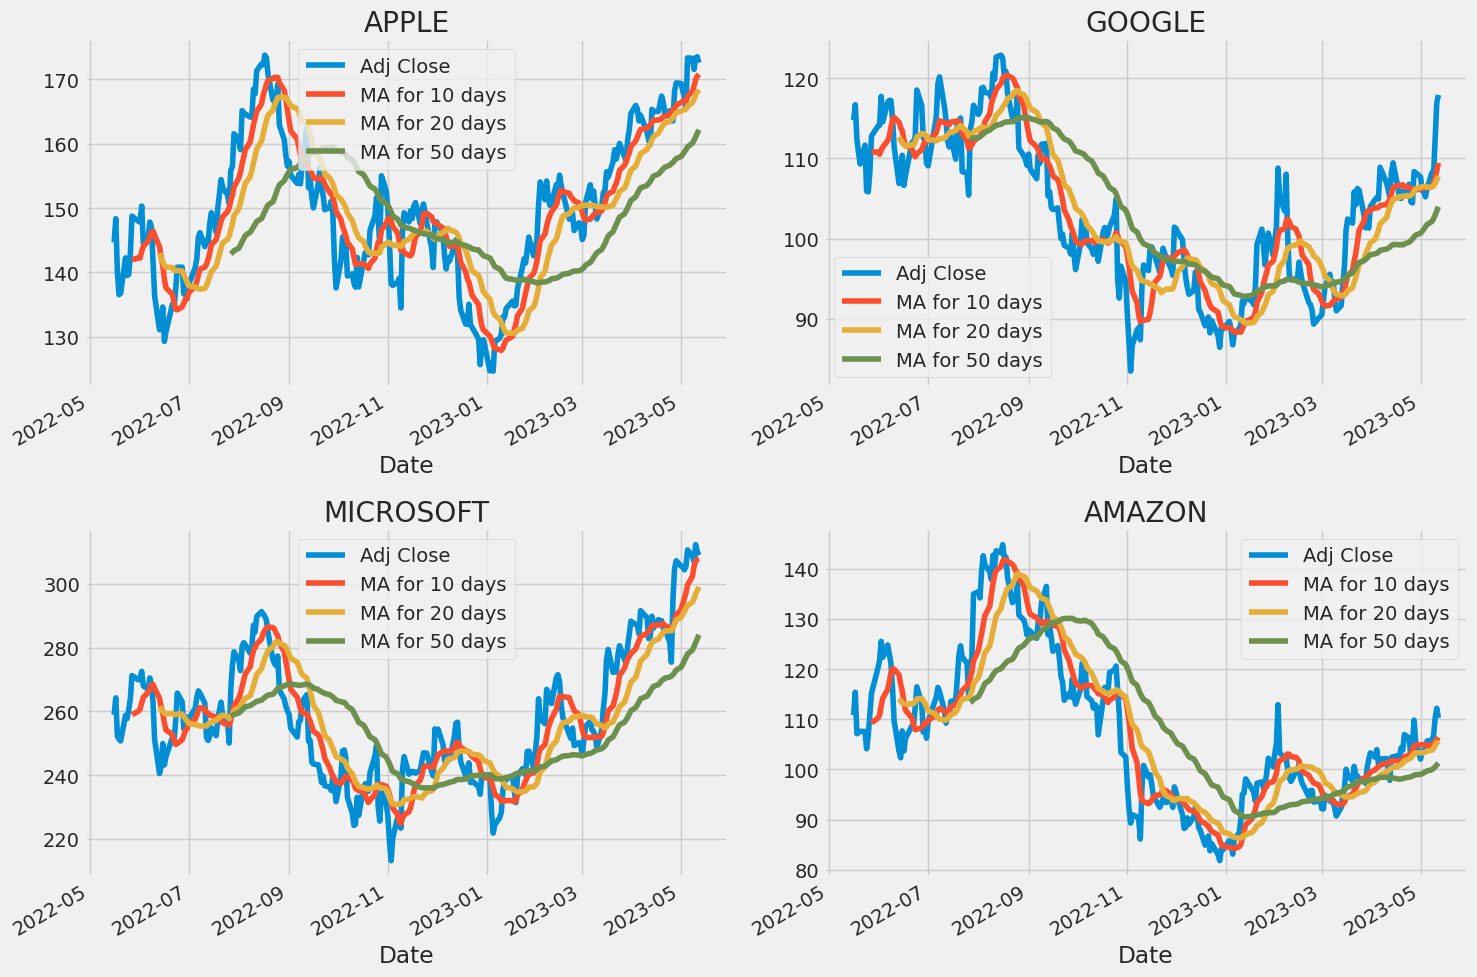

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

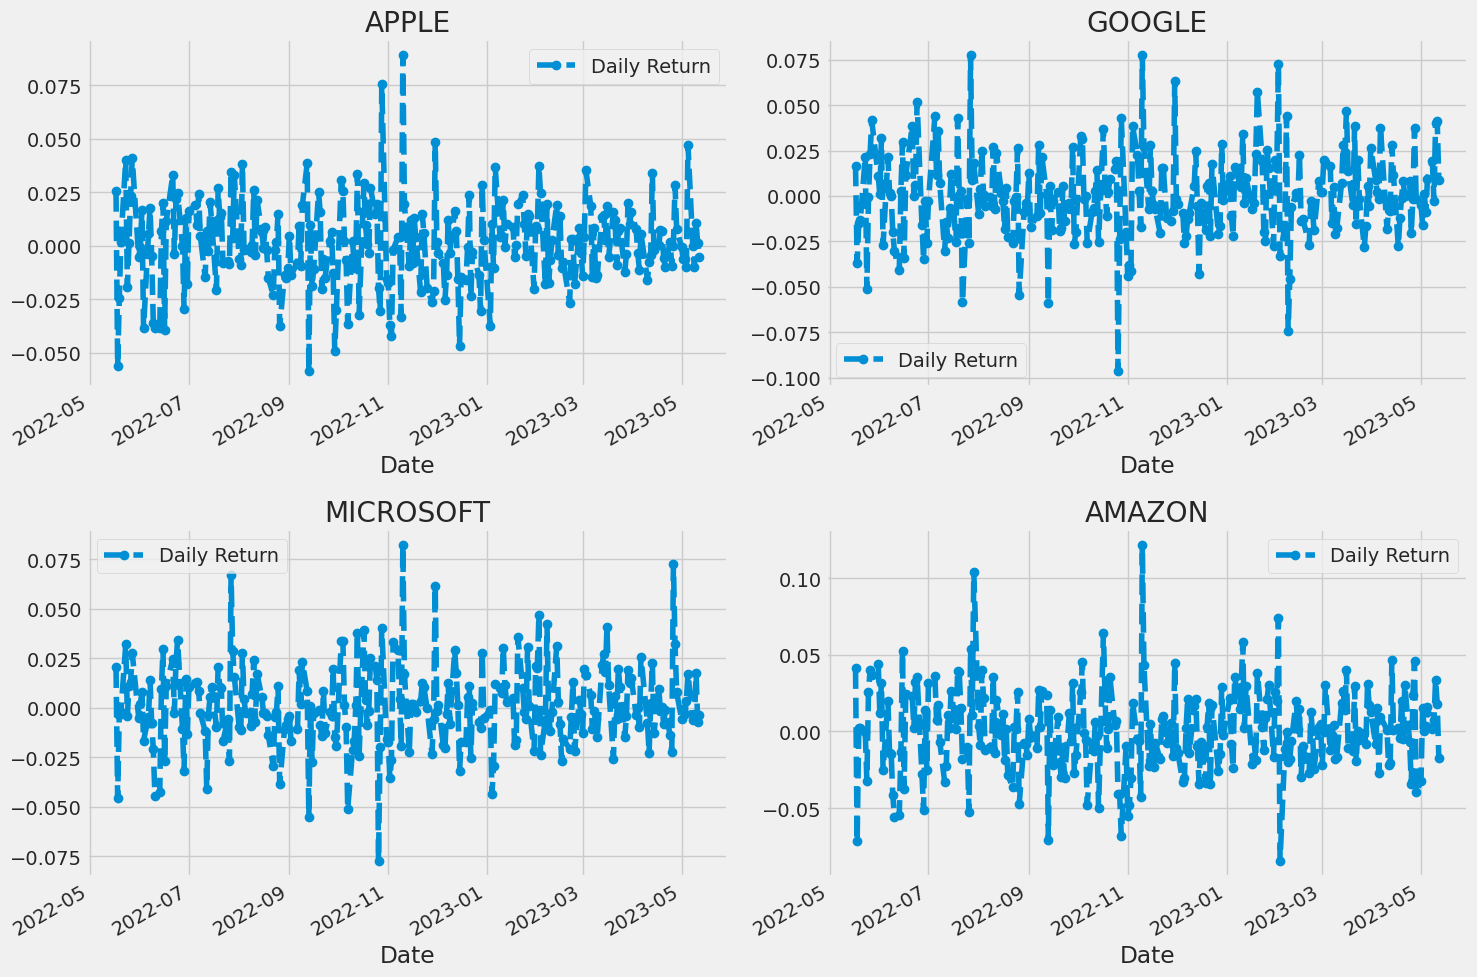

In [ ]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

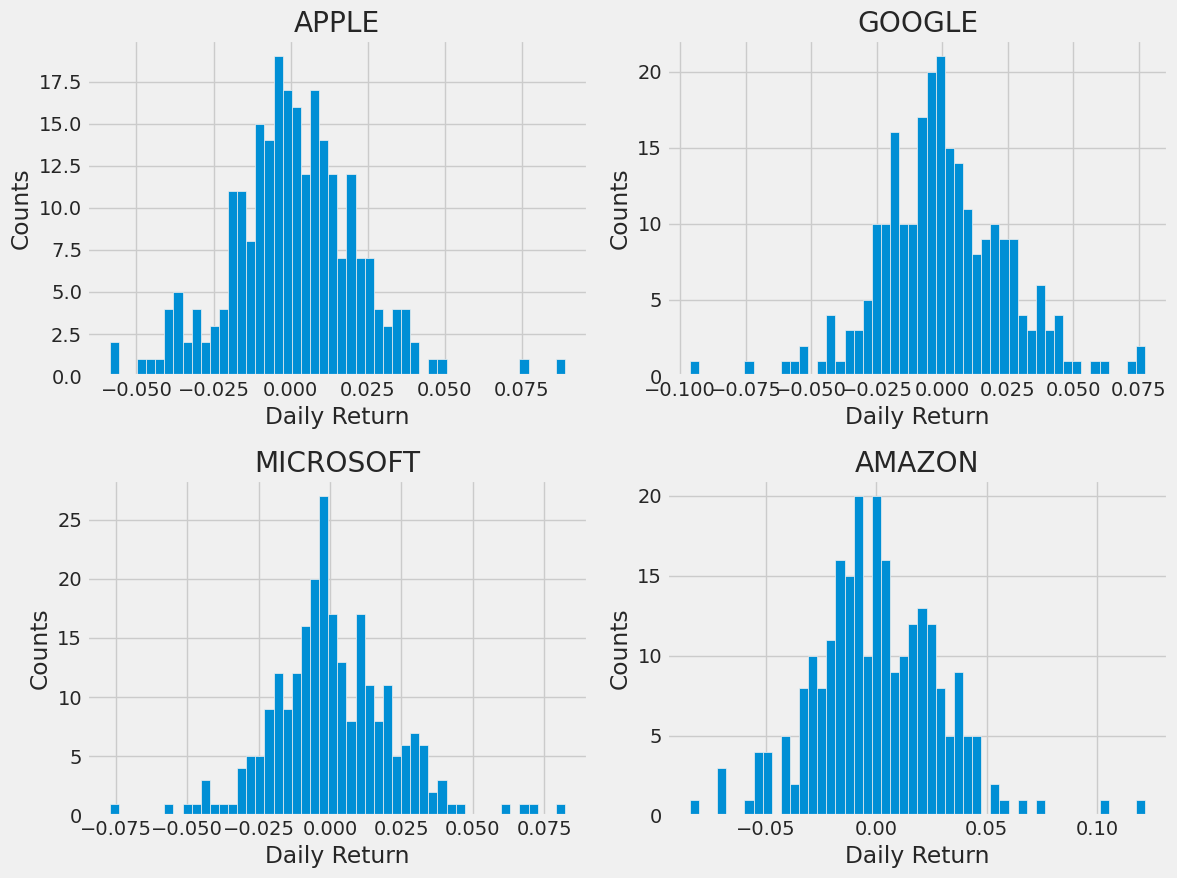

In [ ]:
#histogram

plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [ ]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-05-16,NaN,NaN,NaN,NaN
2022-05-17,0.025423,0.041133,0.016630,0.020344
2022-05-18,-0.056419,-0.071562,-0.036850,-0.045530
2022-05-19,-0.024641,0.001928,-0.014729,-0.003700
2022-05-20,0.001747,0.002535,-0.012935,-0.002291


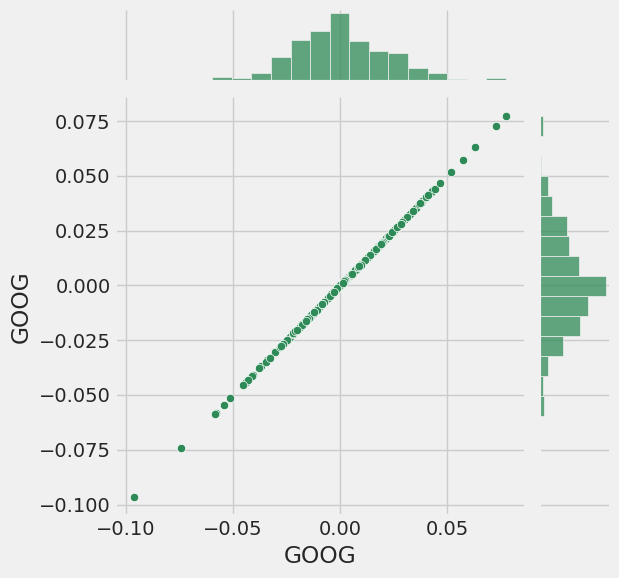

In [ ]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

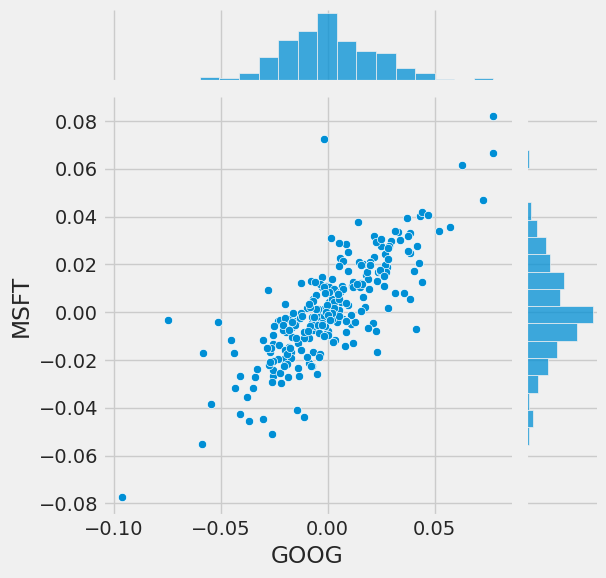

In [ ]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')


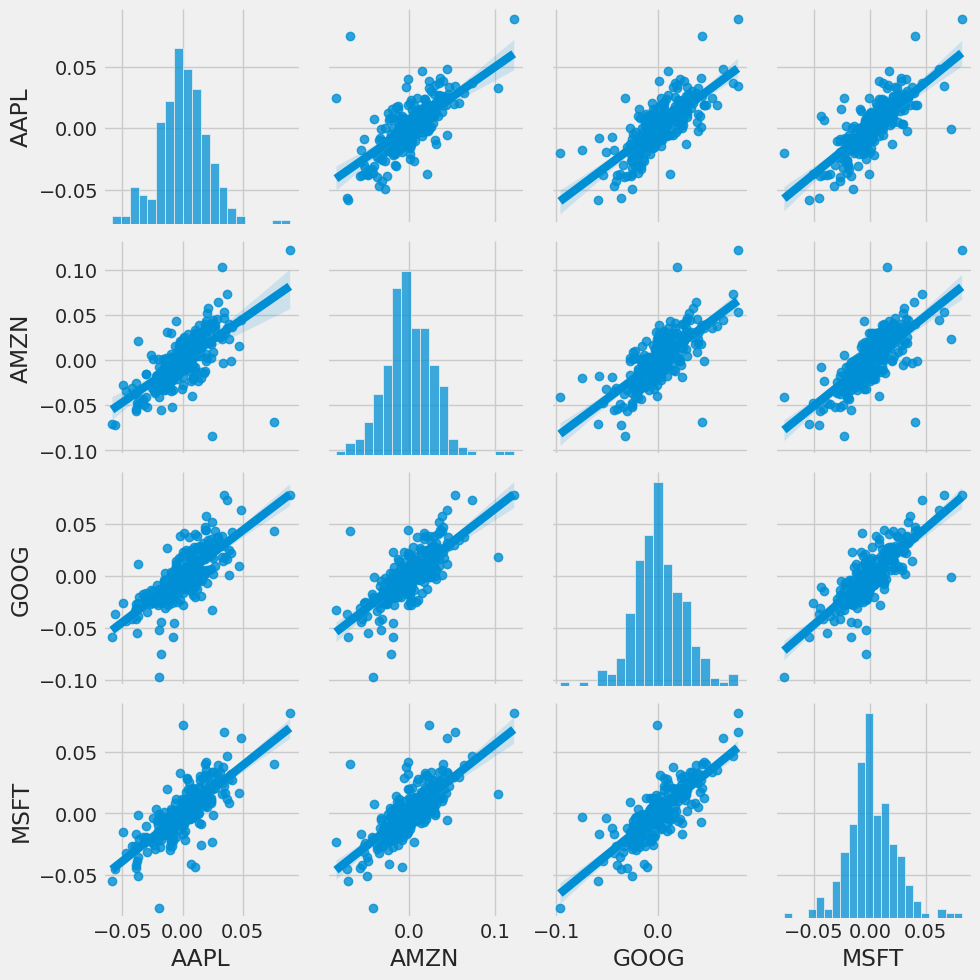

In [ ]:
sns.pairplot(tech_rets, kind = 'reg')

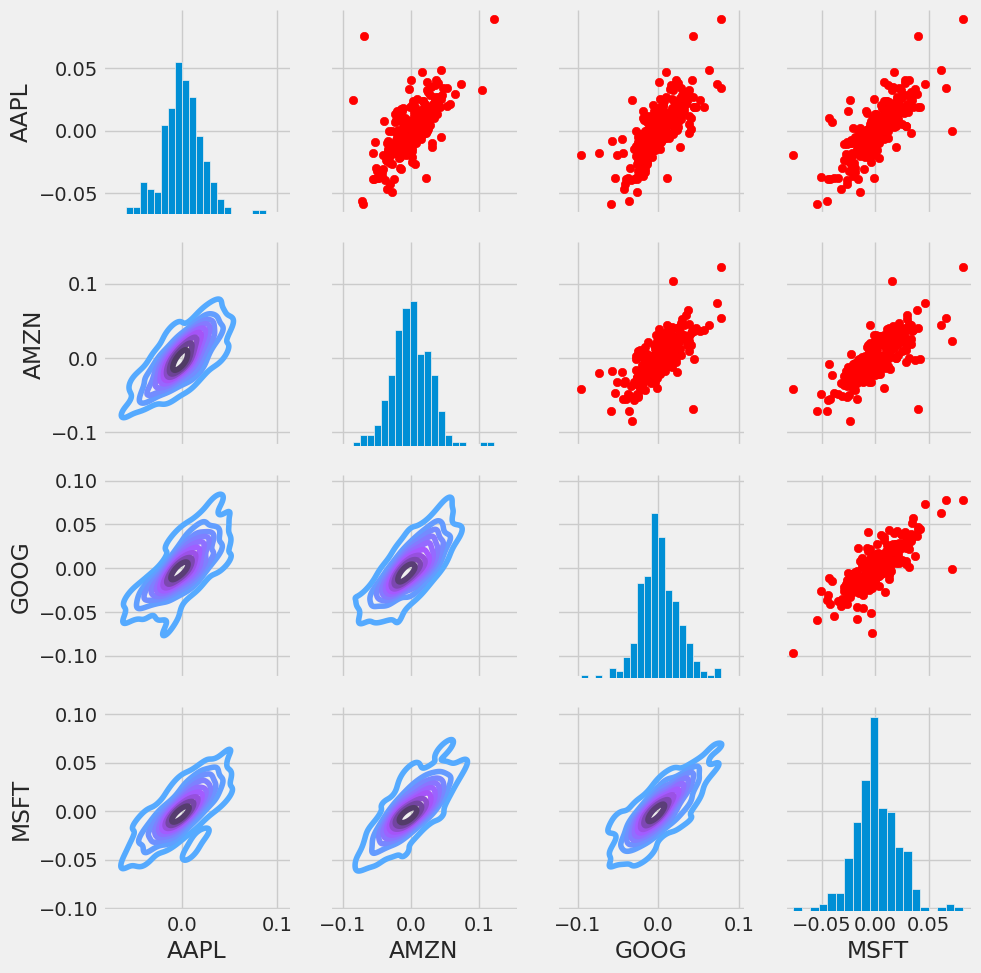

In [ ]:
my_fig = sns.PairGrid(tech_rets.dropna())
my_fig.map_upper(plt.scatter, color = 'red')
my_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
my_fig.map_diag(plt.hist, bins = 20)

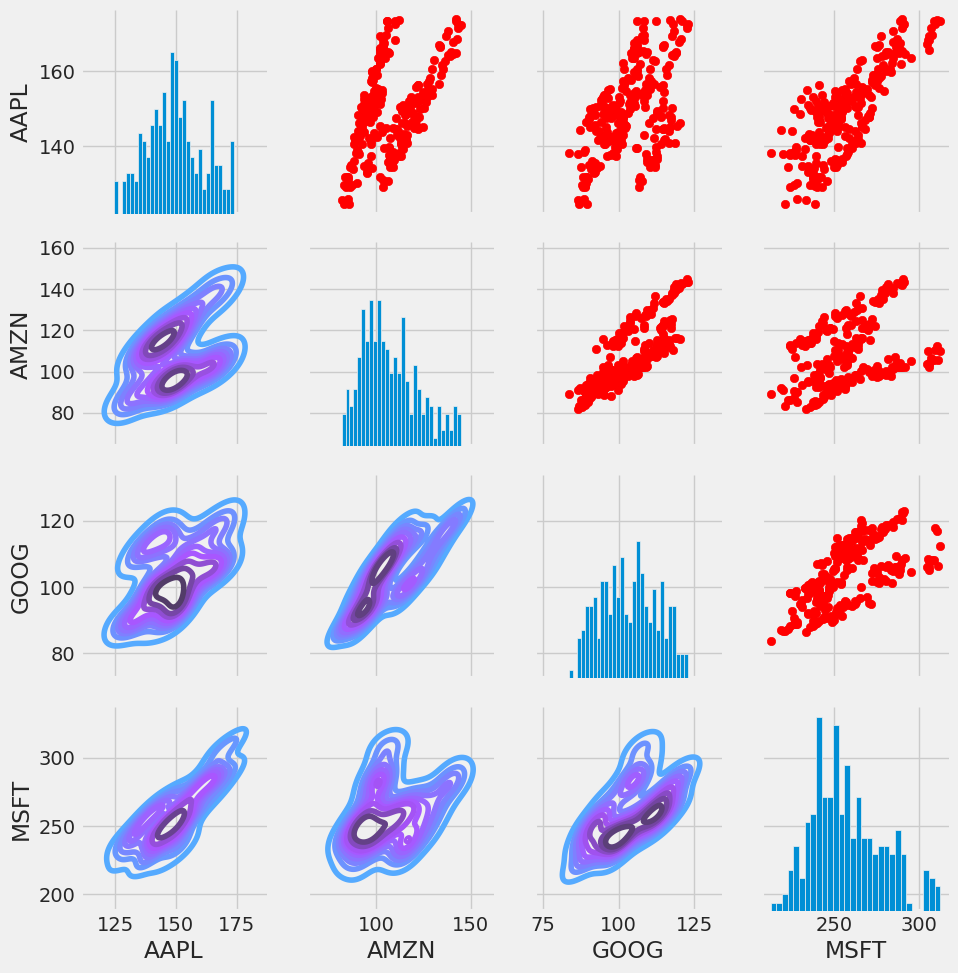

In [ ]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='red')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

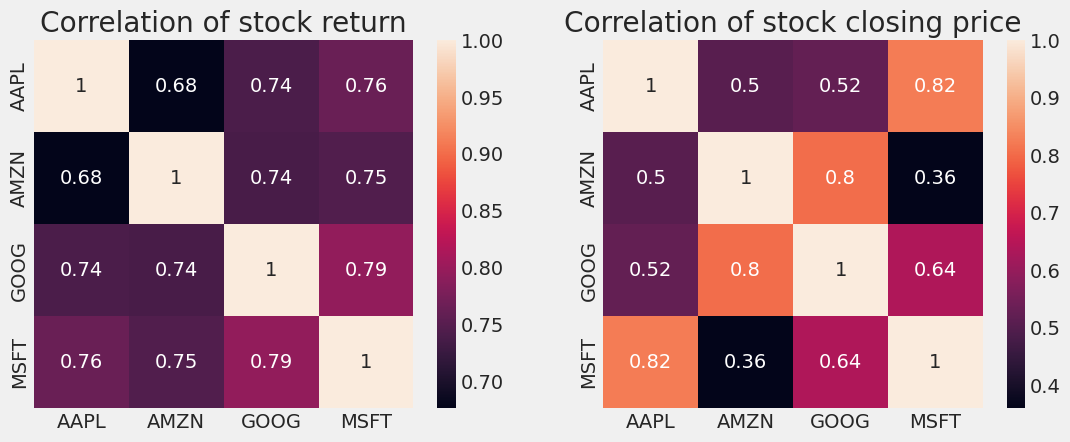

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True)
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True)
plt.title('Correlation of stock closing price')

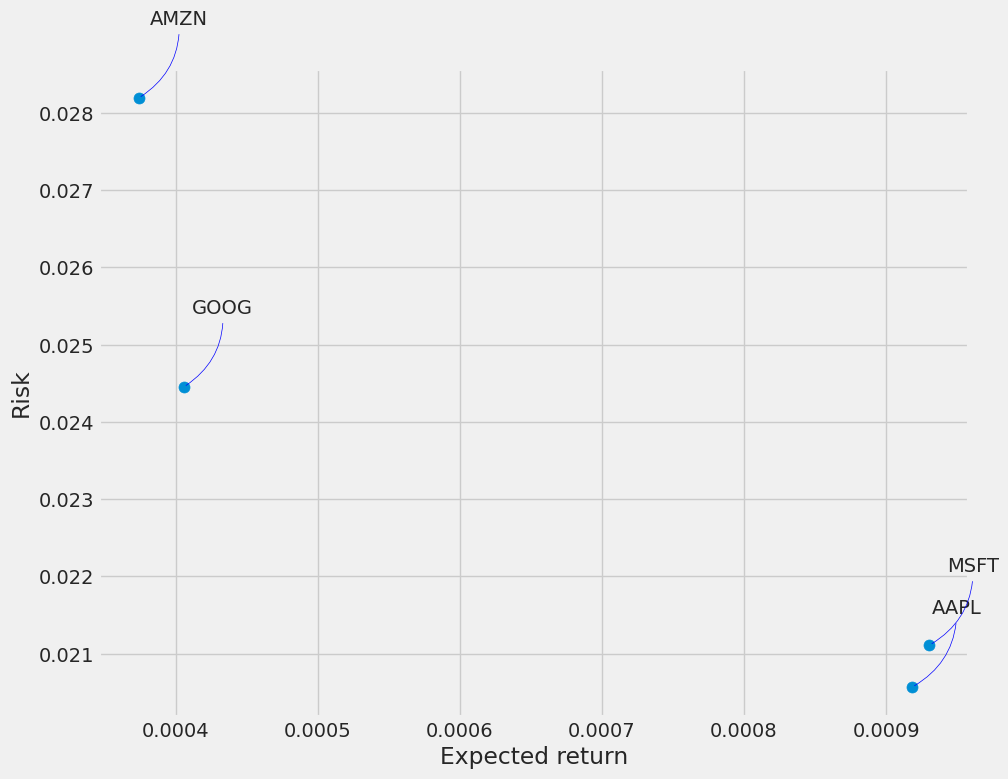

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


In [ ]:
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482925,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550011,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689339,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821995,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801656,394024400
...,...,...,...,...,...,...
2023-05-08,172.479996,173.850006,172.110001,173.500000,173.260345,55962800
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.532745,45326900
2023-05-10,173.020004,174.029999,171.899994,173.559998,173.320267,53724500


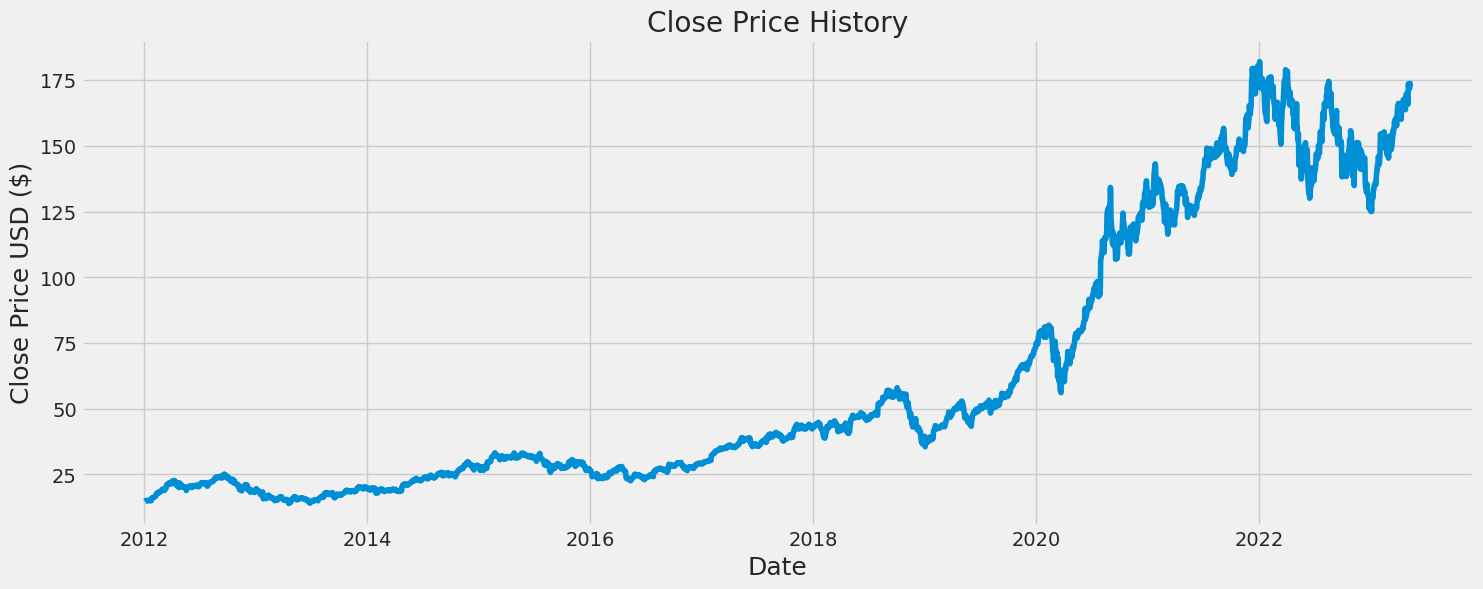

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
data_ = data.values

In [ ]:
train_data_ = int(np.ceil(len(data_) * 0.95))
train_data_

2717

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(data_)
scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.9497211 ],
       [0.95085165],
       [0.94383049]])

In [ ]:
train_data = scaled_data[0:int(train_data_), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    #if i<= 61:
    #    print(x_train)
    #    print(y_train)
    #    print()

x_train, y_train = np.array(x_train), np.array(y_train) 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))       

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2657/2657 [==============================] - 79s 29ms/step - loss: 0.0013


In [ ]:
test_data = scaled_data[train_data_ - 60: , :]


In [32]:
x_test = []
y_test = data_[train_data_:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])